In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from ast import literal_eval
import matplotlib

In [3]:
files = os.listdir('./results')

In [39]:
results4x4 = {'concat_acc':[None]*3, 'inline_acc':[None]*3, 'mm_acc':[None]*3, 'pct_acc':[None]*3,
    'concat_params':[None]*3, 'inline_params':[None]*3, 'mm_params':[None]*3, 'pct_params':[None]*3}
results2x2 = {'concat_acc':[None]*3, 'inline_acc':[None]*3, 'mm_acc':[None]*3, 'pct_acc':[None]*3,
    'concat_params':[None]*3, 'inline_params':[None]*3, 'mm_params':[None]*3, 'pct_params':[None]*3}
for file in files[:24]:
    blocktype, depth, _ = file.split('_')
    df = pd.read_csv(f'./results/{file}')
    acc = max(df['test_accs'])
    numparams = df['numparams'][0]
    depths = [1,6,9]
    assert int(depth) in depths
    depth = depths.index(int(depth))
    if '(4' in file:
        results4x4[f'{blocktype}_acc'][depth] = (acc)
        results4x4[f'{blocktype}_params'][depth] = (numparams)
    if '(2' in file:
        results2x2[f'{blocktype}_acc'][depth] = (acc)
        results2x2[f'{blocktype}_params'][depth] = (numparams)




In [40]:
df2 = pd.DataFrame(results2x2)
df4 = pd.DataFrame(results4x4)

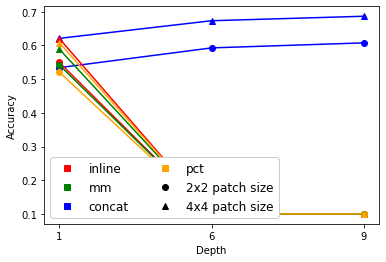

In [41]:
markers=["o","^"]
colors = ["r", "g", "b", "orange"]
plt.plot(df2['concat_acc'], marker='o', label='concat', color = 'blue')
plt.plot(df2['inline_acc'], marker='o', label='inline', color = 'red')
plt.plot(df2['mm_acc'], marker='o', label='mm',color = 'green')
plt.plot(df2['pct_acc'], marker='o', label='pct', color = 'orange')
plt.plot(df4['concat_acc'], marker='^', label='concat', color = 'blue')
plt.plot(df4['inline_acc'], marker='^', label='inline', color ='red')
plt.plot(df4['mm_acc'], marker='^', label='mm', color = 'green')
plt.plot(df4['pct_acc'], marker='^', label='pct', color = 'orange')
plt.xticks([0,1,2], ['1','6','9'])
plt.ylabel('Accuracy')
plt.xlabel('Depth')

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]

handles = [f("s", colors[i]) for i in range(4)]
handles += [f(markers[i], "k") for i in range(2)]

labels = ['inline', 'mm', 'concat', 'pct' ] + ["2x2 patch size", "4x4 patch size"]
#put legend on lower right side of plot:
plt.legend(handles, labels, loc=3, framealpha=1, frameon=True, ncol=2, fontsize=12)

plt.show()